# Setting up dataset in Python

This is the lab portion of the workshop.

The tasks run in parallel to the demo portion of the workshop - all the concepts you need to complete this lab are included there. The best way to learn is by having a go and then using Google when you are stuck, or you can try to consult the documentation: https://docs.python.org/2.7/.

We've also written a help function - if you get stuck on an exercise you can enter a "hint code" which will return some additional instructions.

Try running "helpFunction.helpFx("importing")" to see how this works.

In [16]:
import helpFunction #don't blank this

In [17]:
helpFunction.helpFx("importing")

You can import installed python packages using "import [packages]". You can also import modules at a more detailed level "import [packages].[module]". Sometimes this is preferable because it allows the creation of direct shortcuts to the modules you commonly use "import [packages].[module] as [nickname]". Intead of using the full path of the module each time you want to use it, you can use the nickname. There are informal conventions on nicknames for popular packages: "numpy" is often called "np", "pandas" are "pd". More detail: https://docs.python.org/3/reference/import.html 


**Task 1:** Import the numpy and pandas libraries, and give them shortcut names using "as".

In [4]:
import numpy as np
import pandas as pd

We will now read in the "Auto" dataset using panda's ".read_csv()" method - we've done this for you because i/o methods are outside the scope of this lab.

Note that in this step we are removing rows "*(axis=0)*" with missing values - that isn't the only approach to missing values (imputation etc), but to make the exercise less complicated that is what we are doing.

In [24]:
Auto = pd.read_csv('Auto.csv',na_values="?").dropna(axis=0, how='any') #don't blank this

# Simple Data Manipulation in Python

**Task 2:** Print out a list of the variable names from the Audo dataset.

Hint Codes:  
"printing" : a short guide to the print function

In [36]:
print(list(Auto))

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']


**Task 3:** Use indexing to select the first ten records from the Auto dataset.
  
Hint Codes:  
"index_selection" : selecting records using an index 

In [26]:
Auto[0:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


**Task 4:** Use the ".head()" method of your DataFrame to inspect the first few rows of the Auto dataset. 

What types are variable are in this dataset? Which do you think might be useful for predicting "mpg"?

In [27]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# Simple Linear Modelling

**Task 5:** Import the "statsmodel api" and "statsmodel formula api" libraries and give them nicknames. sm and smf are typical choices for nickname

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

**Task 6:** Use the statsmodel formula API to create a linear model that predicts mpg using horsepower.  
  
Hint Codes:  
"smf_OLS" : how to use the formula api to fit a simple regression.  
"smf_formula" : the basics of writing a formula for the formula api using Patsy

In [29]:
lm = smf.ols("mpg~horsepower",data=Auto).fit()

## Examine the results

**Task 7:** Use the ".dir()" method to explore all the build in methods of your linear model. You will use these some of these methods for remaining tasks in this section.

In [30]:
print(dir(lm))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'params', 'predict', 'pvalues', 'remove_data', 'resid', 'resid_pearson', 'rsquared', 'rsquared_adj', 

**Task 8:** Use the ".summary()" method to display key information about your linear model. 

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           7.03e-81
Time:                        12:52:46   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Task 9:** Identify and use the appropriate method to examine the model coefficients.

What do these imply about the relationship between horsepower and mpg?

In [44]:
#lm.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

**Task 10:** Identify and use the appropriate method to examine the 95% confidence intervals of the model coefficients.

In [38]:
#lm.conf_int(0.05)

,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


**Task 11:** Use label indexing and the ".tvalues" and ".pvalues" methods to examine the significance values of the "horsepower" coefficient. We have provided a pre-built "print()" statement this time, but in the following tasks you will have the opportunity to construct your own.

In [39]:
print("The t-value of the horsepower coefficient is %0.2f, and the associated p-value is %0.2E") % (lm.tvalues['horsepower'], lm.pvalues['horsepower']) #delete string formats

The t-value of the horsepower coefficient is -24.49, and the associated p-value is 7.03E-81


**Task 12:** Identify the methods you can use to display the overall F-value and related p-value for your linear model. Construct a print statement with string formatting to display these results in an appropriate sentence with a useful degree of precision.

Hint Codes:  
"printing" : a short guide to the print function

In [42]:
#print("The F-Statistic of the model is %0.2f and associated p-value is %0.2E") % (lm.fvalue, lm.f_pvalue) #delete

The F-Statistic of the model is 599.72 and associated p-value is 7.03E-81


**Task 13:** Identify the methods you can use to display the r-square and r-squared adjusted statistics for your linear model. Construct a print statement with string formatting to display these results in an appropriate sentence with a useful degree of precision.

In [43]:
#print("The R-squared value is %0.3f and the R-squared adjusted is %0.3f") % (lm.rsquared, lm.rsquared_adj)

The R-squared value is 0.606 and the R-squared adjusted is 0.605


## Predicting new observations

We need to predict "mpg" for three new cars that have just rolled of the production line. 

**Task 14:** Construct a DataFrame called "Xnew"  with a single column called "horsepower" and three observations (100.0, 150.0 and 200.0).

Hint Codes:  
"dataframe" : a short guide to constructing a DataFrame [TO DO]

In [47]:
Xnew = #pd.DataFrame([100.0,150.0,200.0],columns = ['horsepower'])

**Task 15:** Use the "predict()" method of your linear model to predict the mpg values for the new cars.

In [48]:
ynewpred = #lm.predict(Xnew) 
print(ynewpred)

[ 24.15138769  16.25915102   8.36691435]


As discussed in the lab, there are currently no methods for confidence and prediction intervals - the code below can calculate them - but I haven't edited it.

Alter the code below to get confidence and prediction intervals for your predictions. Note that I called my predictions "ynewpred".

In [45]:
from scipy import stats

#                     /-------------------
# t_stat * std_er *  /            rpr_sq
#                   /  inv_ob + ----------
#                  v               sxx

# ssx = sm_x2s - sm_xs2
#                -------
#                lm.nobs


# Sum of the x^2's 
sm_x2s = ((Auto['horsepower']**2).sum())

# Sum of the x's squared
sm_xs2 = (Auto['horsepower'].sum())**2

# Calculating Sxx
sxx = (sm_x2s - sm_xs2/lm.nobs)

# T statistic
t_stat = stats.t.ppf(1-0.025, lm.nobs - 2)

# Standard error (square root of MSE) [tick]
std_er = lm.mse_resid**0.5

# Inverse of the nubmer of observatinos
inv_ob = (1/lm.nobs)

# Residual of the predicted value squared  [mean mpg: fick]
rpr_sq = (Xnew['horsepower'].values - (Auto['horsepower'].mean()))**2

# Calculating confidence interval/2
ci = t_stat*std_er*((inv_ob  + rpr_sq/sxx)**0.5)

# Calculating prediction interval/2
pi = t_stat*std_er*((1+inv_ob  + rpr_sq/sxx)**0.5)

# Recreating confidence interval matrix
ci_pd = pd.DataFrame(ynewpred,columns=['fit'])
ci_pd['lwr'] = ynewpred-ci
ci_pd['upr'] = ynewpred+ci

# Recreating prediction interval matrix
pi_pd = pd.DataFrame(ynewpred,columns=['fit'])
pi_pd['lwr'] = ynewpred-pi
pi_pd['upr'] = ynewpred+pi

print(ci_pd)
print(pi_pd)

         fit        lwr        upr
0  23.362164  22.874970  23.849358
1  24.151388  23.660958  24.641817
2  21.783717  21.278621  22.288812
         fit        lwr        upr
0  23.362164  13.704829  33.019499
1  24.151388  14.493888  33.808887
2  21.783717  12.125462  31.441972


## Visualising data and diagnostic plots

Import matplotlib pyplot and give it the nickname plt

In [46]:
import matplotlib.pyplot as plt

Using the methods of pyplot, create a scatting plot comparing horsepower to mpg, and label the axis. 
  
Hint Codes:  
"plot_basics" : how to make a chart using pyplot

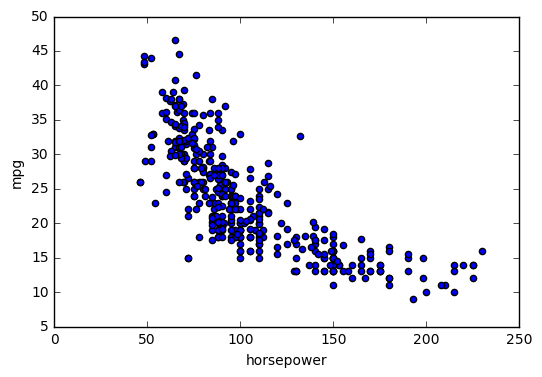

In [47]:
plt.scatter(Auto['horsepower'],Auto['mpg'])
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

Create a graph with:  
  
a) a scatter plot of horsepower and mpg, using black "+" symbols for the points.  
b) a line plot of horsepower and the fitted values, using a red line of width 2  
c) labeled axis wioth size 12 font

Hint Codes:  
"plot_options" : how to customise a chart using pyplot [to do]

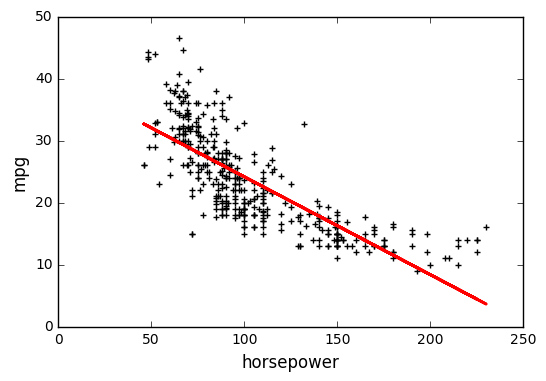

In [48]:
plt.scatter(Auto['horsepower'],Auto['mpg'],marker="+",c="black")
plt.plot(Auto['horsepower'],lm.fittedvalues, color='red', linewidth=2)
plt.xlabel('horsepower', fontsize=12)
plt.ylabel('mpg', fontsize=12)
plt.show()

Create four plots to explore the quality of your model:

a) fitted values vs redisuals  
b) A normal Q-Q plot (we have done this for yout as it relatively complex)  
c) fitted values vs square root of standardised redisuals  
d) leverage vs standardised residuals  

The markers should be a red "x", and the axis should be appropriately labelled in size 12 font.

For this example we have left in the structural elements of the plot (figure size, subplot, show), there is an opportunity to test this functionality later in the lab.  

Hint Codes:  
"diagnostic_graphs" : how to get diagnostic properties (e.g. residuals) for your model  
"get_leverage" : how to get leverage statistics for your observations  
"square_root" : how to calculate a square root in python

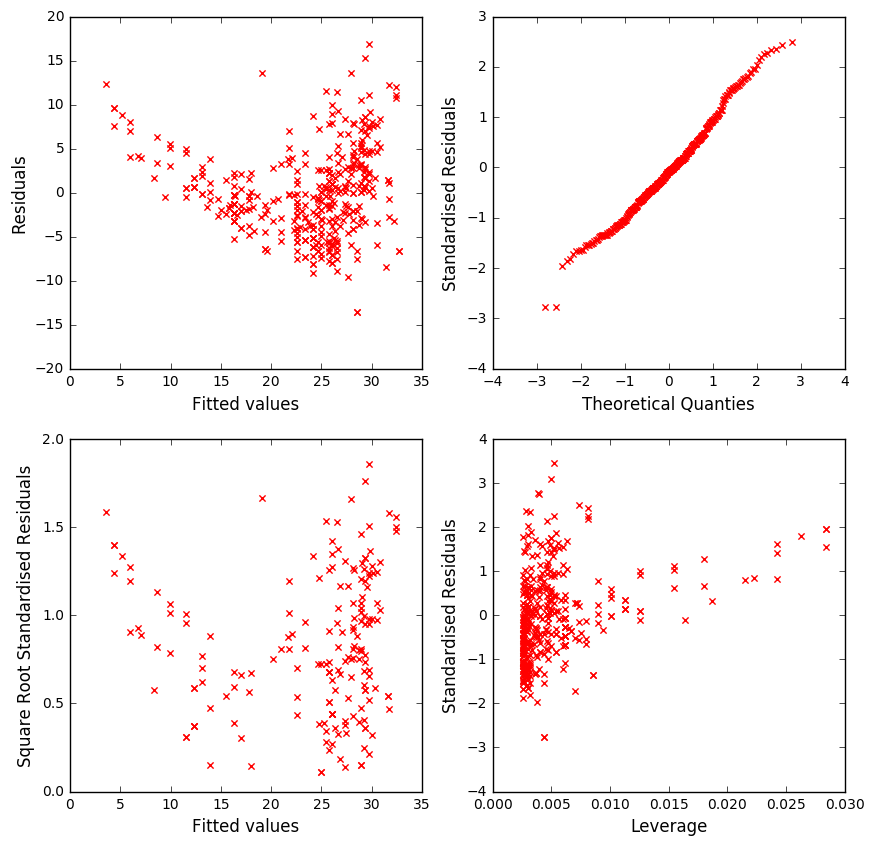

In [49]:
#Set plotsize - the below means ten inches down by ten inches across.
plt.figure(figsize=(10,10))

# Top Left
plt.subplot(221)
plt.scatter(lm.fittedvalues,lm.resid,marker="x",c="red")
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

# Top Right
theoretical_distribution = np.sort((stats.norm.ppf((boston_pd['horsepower'].index.values + 1)/(lm.nobs+1))))
observed_distribution = np.sort(lm.resid_pearson)

plt.subplot(222)
plt.scatter(theoretical_distribution,observed_distribution,marker="+",c="black")
plt.plot([min(np.min(observed_distribution),np.min(theoretical_distribution)),max(np.max(observed_distribution),np.max(theoretical_distribution))],[min(np.min(observed_distribution),np.min(theoretical_distribution)),max(np.max(observed_distribution),np.max(theoretical_distribution))], color='grey', linewidth=1)
plt.xlabel('Theoretical Quanties', fontsize=12)
plt.ylabel('Standardised Residuals', fontsize=12)
                                                                                             
# Bottom Left
plt.subplot(223)
plt.ylim(0.0,2.0)
plt.scatter(lm.fittedvalues,lm.resid_pearson**.5,marker="x",c="red")
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('Square Root Standardised Residuals', fontsize=12)

# Bottom Right
plt.subplot(224)
plt.xlim(0.00,0.03)
plt.scatter((lm.get_influence().hat_matrix_diag),lm.resid_pearson,marker="x",c="red")
plt.xlabel('Leverage', fontsize=12)
plt.ylabel('Standardised Residuals', fontsize=12)

plt.show()

Determine which observation in your model has the highest leverage using the argmax() method.

Hint Codes:  
"argmax" : how to get the index of the highest value observation in a vector

In [62]:
high_lev = (lm.get_influence().hat_matrix_diag).argmax()
print("Index of highest leverage observation: %s") % high_lev

Index of highest leverage observation: 115


Determine the horsepower and mpg values of the highest leverage observation using the loc() method.

Hint Codes:  
"loc" : how to select values from a Dataframe

In [64]:
high_lev_hp = Auto.loc[high_lev,['horsepower']]
high_lev_mpg = Auto.loc[high_lev,['mpg']]
print("Vales of highest leverage observation: %0.1f horsepower, %0.1f mpg") % (high_lev_hp,high_lev_mpg)

Vales of highest leverage observation: 145.0 horsepower, 15.0 mpg


Determine the leverage value of the highest leverage observation by selecting the relevant element of the hat matrix diagonal.

In [53]:
lev_max = (lm.get_influence().hat_matrix_diag)[high_lev]
print("Leverage of highest leverage observation: %0.4f ") % lev_max

Leverage of highest leverage observation: 0.0307 


# Multiple Linear Regression

We're now going to go back to the simpler split of the data into IV/DV

In [68]:
Auto_DV = pd.DataFrame(Auto,columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin'])
Auto_IV = pd.DataFrame(Auto,columns = ['mpg'])

Another way to run linear regressions (without using the formula api).

For the following examples, we cannot use the formula api becuase the python implimentation doesn't use "." to represent "all variables"

Notice that in this method we now have to add the constant mannually

In [69]:
lm = sm.OLS(Auto_IV,sm.add_constant(Auto_DV)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          2.04e-139
Time:                        11:23:28   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000       -26.350    -8.087
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
year             0.7508      0.051     14.729      0.000         0.651     0.851
origin           1.4261      0.278      5.127      0.000         0.879     1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Variance Inflation Factor

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = pd.DataFrame()
vif["Features"] = sm.add_constant(Auto_DV).columns
vif["VIF Factor"] = [variance_inflation_factor(sm.add_constant(Auto_DV).values, i) for i in range(len(vif["Features"]))]

In [14]:
vif

NameError: name 'vif' is not defined

## Re-fitting the model

In the R version of this code, we demonstrated subtracting variables from the "." (all variables) symbol, and also updating an existing model:

lm.fit1=lm(mpg~.-age,data=Auto)
lm.fit1=update(lm.fit, ~.-age)

These functions do not exist in python, but the first can easily be replicated:

In [78]:
lm3 = sm.OLS(Auto_IV,sm.add_constant(Auto_DV).drop(["displacement"], axis=1)).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     288.8
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          3.67e-139
Time:                        11:34:43   Log-Likelihood:                -1027.0
No. Observations:                 392   AIC:                             2068.
Df Residuals:                     385   BIC:                             2096.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -18.0915      4.669     -3.875      0.000       -27.271    -8.912
cylinders        0.0746      0.244      0.306      0.760        -0.405     0.554
horsepower      -0.0062      0.013     -0.470      0.638        -0.032     0.020
weight          -0.0058      0.001     -9.580      0.000        -0.007    -0.005
acceleration     0.0538      0.099      0.543      0.587        -0.141     0.249
year             0.7418      0.051     14.472      0.000         0.641     0.843
origin           1.1927      0.266      4.487      0.000         0.670     1.715
==============================================================================
Omnibus:                       35.452   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.984
Skew:                           0.562   Prob(JB):                     3.47e-14
Kurtosis:                       4.591   Cond. No.                     8.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interaction Terms

In [81]:
selected_DV = sm.add_constant(Auto_DV.loc[:, ["horsepower","weight"]])
selected_DV["horsepower*weight"] = Auto_DV.loc[:, ["horsepower"]].values*Auto_DV.loc[:, ["weight"]].values

lm = sm.OLS(Auto_IV,selected_DV).fit()
lm.summary()

#Replicate this

#selected_DV4 = sm.add_constant(boston_DV[["lstat","crim"]])
#selected_DV4["lstat*crim"] = boston_DV["lstat"]*boston_DV["crim"]
#lm4 = sm.OLS(boston_IV,selected_DV4).fit()
#lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Wed, 28 Mar 2018   Prob (F-statistic):          7.26e-116
Time:                        11:36:10   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                63.5579      2.343     27.127      0.000        58.951    68.164
horsepower           -0.2508      0.027     -9.195      0.000        -0.304    -0.197
weight               -0.0108      0.001    -13.921      0.000        -0.012    -0.009
horsepower*weight  5.355e-05   6.65e-06      8.054      0.000      4.05e-05  6.66e-05
==============================================================================
Omnibus:                       34.175   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.522
Skew:                           0.577   Prob(JB):                     1.45e-12
Kurtosis:                       4.417   Cond. No.                     4.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Non-linear Transformations of the Predictors

In [93]:
selected_DV = sm.add_constant(Auto_DV.loc[:, ["horsepower"]])
selected_DV["horsepower*^2"] = Auto_DV.loc[:, ["horsepower"]].values**2

lm2 = sm.OLS(Auto_IV,selected_DV).fit()
lm2.summary()

#selected_DV5 = sm.add_constant(boston_DV[["lstat"]])
#selected_DV5["sqrt(lstat)"] = boston_DV["lstat"]**0.5
#lm5 = sm.OLS(boston_IV,selected_DV5).fit()
#lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           5.40e-99
Time:                        11:42:39   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            56.9001      1.800     31.604      0.000        53.360    60.440
horsepower       -0.4662      0.031    -14.978      0.000        -0.527    -0.405
horsepower*^2     0.0012      0.000     10.080      0.000         0.001     0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#import math
#
#selected_DV6 = sm.add_constant(boston_DV[["lstat"]])
#selected_DV6["log(lstat)"] = (boston_DV["lstat"]).apply(math.log)
#lm6 = sm.OLS(boston_IV,selected_DV6).fit()
#lm6.summary()

## Nested Model Comparisons

In [94]:
sm.stats.anova_lm(lm,lm5)

   df_resid          ssr  df_diff     ss_diff           F        Pr(>F)
0     390.0  9385.915872      0.0         NaN         NaN           NaN
1     389.0  7442.029412      1.0  1943.88646  101.608283  2.196340e-21


In [ ]:
sm.stats.anova_lm(lm,lm6)

In [ ]:
sm.stats.anova_lm(lm,lm2)

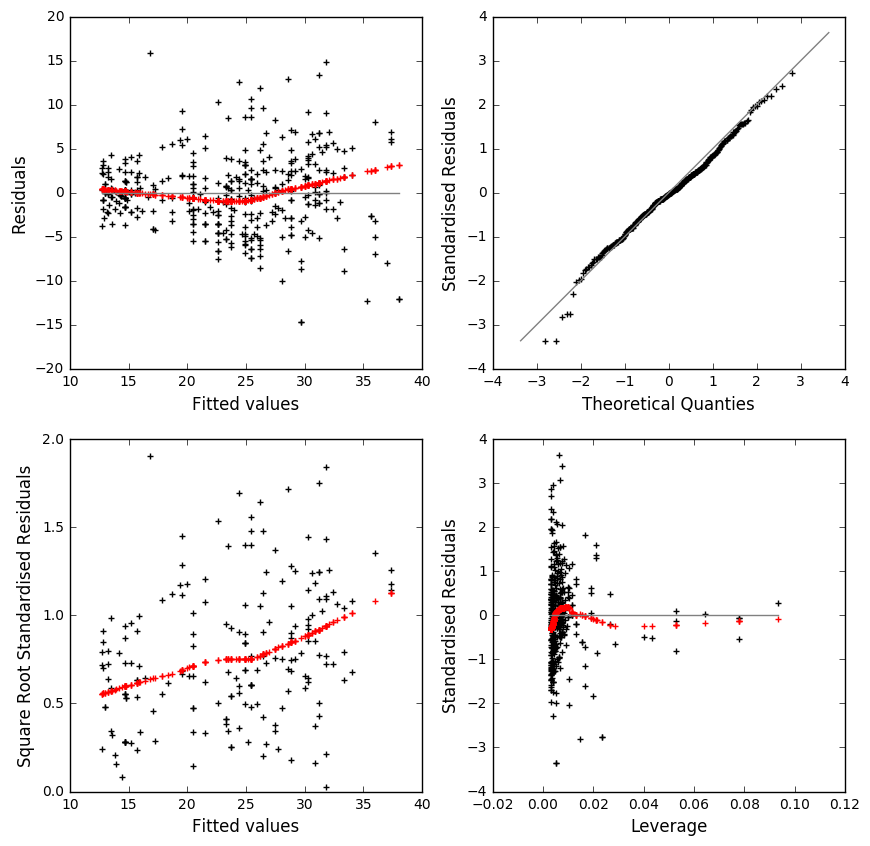

In [95]:
#Set plotsize - the below means ten inches down by ten inches across.
plt.figure(figsize=(10,10))

# Top Left
plt.subplot(221)
plt.scatter(lm2.fittedvalues,lm2.resid,marker="+",c="black")
plt.scatter(lm2.fittedvalues,sm.nonparametric.lowess(lm2.resid,lm2.fittedvalues, return_sorted=False), marker="+", c='red')
plt.plot([np.min(lm2.fittedvalues),np.max(lm2.fittedvalues)],[0,0], color='grey', linewidth=1)
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

# Top Right
plt.subplot(222)
plt.scatter(np.sort((stats.norm.ppf((Auto['mpg'].index.values + 1)/(lm2.nobs+1)))),np.sort(lm2.resid_pearson),marker="+",c="black")
plt.plot([min(np.min(lm2.resid_pearson),np.min(((stats.norm.ppf((Auto['mpg'].index.values + 1)/(lm2.nobs+1)))))),max(np.max(lm2.resid_pearson),np.max(((stats.norm.ppf((Auto['mpg'].index.values + 1)/(lm2.nobs+1))))))],[min(np.min(lm2.resid_pearson),np.min(((stats.norm.ppf((Auto['mpg'].index.values + 1)/(lm2.nobs+1)))))),max(np.max(lm2.resid_pearson),np.max(((stats.norm.ppf((Auto['mpg'].index.values + 1)/(lm2.nobs+1))))))], color='grey', linewidth=1)
plt.xlabel('Theoretical Quanties', fontsize=12)
plt.ylabel('Standardised Residuals', fontsize=12)
                                                 
                                                  
# Bottom Left
plt.subplot(223)
plt.ylim(0.0,2.0)
plt.scatter(lm2.fittedvalues,lm2.resid_pearson**.5,marker="+",c="black")
plt.scatter(lm2.fittedvalues,sm.nonparametric.lowess(lm2.resid_pearson**.5,lm2.fittedvalues, return_sorted=False), marker="+", c='red')
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('Square Root Standardised Residuals', fontsize=12)


# Bottom Right
plt.subplot(224)
plt.scatter((lm2.get_influence().hat_matrix_diag),lm2.resid_pearson,marker="+",c="black")
plt.scatter((lm2.get_influence().hat_matrix_diag),sm.nonparametric.lowess(lm2.resid_pearson,(lm2.get_influence().hat_matrix_diag), return_sorted=False), marker="+", c='red')
plt.plot([np.min((lm2.get_influence().hat_matrix_diag)),np.max((lm2.get_influence().hat_matrix_diag))],[0,0], color='grey', linewidth=1)
plt.xlabel('Leverage', fontsize=12)
plt.ylabel('Standardised Residuals', fontsize=12)

plt.show()

#####CHECK BELOW#####

plt.figure(figsize=(10,10))

# Top Left
plt.subplot(221)
plt.scatter(lm6.fittedvalues,lm6.resid,marker="+",c="black")
plt.scatter(lm6.fittedvalues,sm.nonparametric.lowess(lm6.resid,lm6.fittedvalues, return_sorted=False), marker="+", c='red')
plt.plot([np.min(lm6.fittedvalues),np.max(lm6.fittedvalues)],[0,0], color='grey', linewidth=1)
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

# Top Right
theoretical_distribution = np.sort((stats.norm.ppf((boston_pd['medv'].index.values + 1)/(lm6.nobs+1))))
observed_distribution = np.sort(lm6.resid_pearson)

plt.subplot(222)
plt.scatter(theoretical_distribution,observed_distribution,marker="+",c="black")
plt.plot([min(np.min(observed_distribution),np.min(theoretical_distribution)),max(np.max(observed_distribution),np.max(theoretical_distribution))],[min(np.min(observed_distribution),np.min(theoretical_distribution)),max(np.max(observed_distribution),np.max(theoretical_distribution))], color='grey', linewidth=1)
plt.xlabel('Theoretical Quanties', fontsize=12)
plt.ylabel('Standardised Residuals', fontsize=12)

# Bottom Left
plt.subplot(223)
plt.ylim(0.0,2.0)
plt.scatter(lm6.fittedvalues,lm6.resid_pearson**.5,marker="+",c="black")
plt.scatter(lm6.fittedvalues,sm.nonparametric.lowess(lm6.resid_pearson**.5,lm6.fittedvalues, return_sorted=False), marker="+", c='red')
plt.xlabel('Fitted values', fontsize=12)
plt.ylabel('Square Root Standardised Residuals', fontsize=12)

# Bottom Right
plt.subplot(224)
plt.xlim(0.00,0.03)
plt.scatter((lm6.get_influence().hat_matrix_diag),lm6.resid_pearson,marker="+",c="black")
plt.scatter((lm6.get_influence().hat_matrix_diag),sm.nonparametric.lowess(lm6.resid_pearson,(lm6.get_influence().hat_matrix_diag), return_sorted=False), marker="+", c='red')
plt.plot([np.min((lm6.get_influence().hat_matrix_diag)),np.max((lm6.get_influence().hat_matrix_diag))],[0,0], color='grey', linewidth=1)
plt.xlabel('Leverage', fontsize=12)
plt.ylabel('Standardised Residuals', fontsize=12)

plt.show()

# Qualitative Predictors

## Including Existing Qualitative Predictors

In [ ]:
selected_DV7 = selected_DV6.copy()
selected_DV7["chas"] = boston_DV["chas"].copy()
lm7 = sm.OLS(boston_IV,selected_DV7).fit()
lm7.summary()

In [ ]:
sm.stats.anova_lm(lm6,lm7)

## Creating New Qualitative Predictors

In [ ]:
#set(Auto["cylinders"])
#boxplots?

n_bins = int(boston_DV["rad"].max()-boston_DV["rad"].min())
plt.hist(boston_DV["rad"], bins=n_bins)
plt.show()

In [ ]:
def categoricalRadius(radius):
    '''Return a categorical variable based on the accessibility to radial highways. Visual inspection reveals accessibilty clusters one where the accessibilty index is less than 10 and one where it is more than 20.'''
    
    if radius <= 10:
        catRad = "Near"
    else:
        catRad = "Far"
        
    return catRad

In [ ]:
selected_DV8 = selected_DV7.copy()
catRad = (boston_DV["rad"]).apply(categoricalRadius)

In [ ]:
selected_DV8[["Rad_Far", "Rad_Near"]] = pd.get_dummies(catRad, prefix='Rad')
selected_DV8 = selected_DV8.drop(["Rad_Near"],axis=1)

In [ ]:
lm8 = sm.OLS(boston_IV,selected_DV8).fit()
lm8.summary()

In [ ]:
sm.stats.anova_lm(lm,lm6,lm7,lm8)